Let's start our resnet model

In [7]:
from keras.datasets import cifar10

import keras
import matplotlib.pyplot as plt

In [8]:
batchSize = 32
nunClasses = 10
epochs = 10

# Loading the CIFAR dataset
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

# Displaying the shape and dimensions of our data
print("xTrain shape : {}\n".format(xTrain.shape))
print("Train samples : {}\n".format(xTrain.shape[0]))
print("xTest shape {}\n".format(xTest.shape))
print("test samples : {}\n".format(xTest.shape[0]))

xTrain shape : (50000, 32, 32, 3)

Train samples : 50000

xTest shape (10000, 32, 32, 3)

test samples : 10000



In [9]:
# Let's format the data by normalizing and changing this data type to float 32
xTrain = xTrain.astype("float32")
xTest = xTest.astype("float32")

xTrain /= 255
xTest /= 255

In [10]:
# Now we one hot encode the outputs
yTrain = keras.utils.to_categorical(yTrain, nunClasses)
yTest = keras.utils.to_categorical(yTest, nunClasses)

In [11]:
from Resnet50 import resNet50
model = resNet50(input_shape = (xTrain.shape[1], xTrain.shape[2], xTrain.shape[3]), classes = nunClasses)

In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [13]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(xTrain, yTrain, epochs = epochs, batch_size = batchSize, 
                    verbose = 1, validation_data = (xTest, yTest))

score = model.evaluate(xTest, yTest, verbose = 0)
print("Test Loss : {}".format(score[0]))
print("Test accuracy : {}".format(score[1]))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1449s 29ms/step - loss: 2.3679 - acc: 0.2858 - val_loss: 5.7193 - val_acc: 0.2043
Epoch 2/10
50000/50000 [==============================] - 1409s 28ms/step - loss: 2.1723 - acc: 0.3431 - val_loss: 2.6807 - val_acc: 0.2066
Epoch 3/10
50000/50000 [==============================] - 1414s 28ms/step - loss: 2.3294 - acc: 0.2756 - val_loss: 2.1539 - val_acc: 0.2328
Epoch 4/10
50000/50000 [==============================] - 1409s 28ms/step - loss: 2.3774 - acc: 0.2488 - val_loss: 2.2604 - val_acc: 0.1757
Epoch 5/10
50000/50000 [==============================] - 1413s 28ms/step - loss: 2.4819 - acc: 0.2197 - val_loss: 2.1143 - val_acc: 0.2416
Epoch 6/10
50000/50000 [==============================] - 1417s 28ms/step - loss: 2.0824 - acc: 0.2846 - val_loss: 2.0214 - val_acc: 0.3290
Epoch 7/10
5

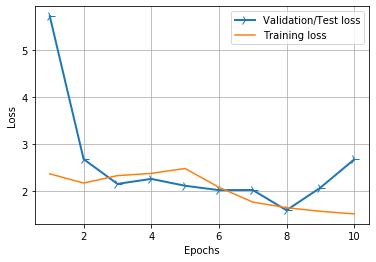

In [14]:
# Ploting the Loss Charts 
historyDict = history.history

lossValues = historyDict["loss"]
valLossValues = historyDict["val_loss"]
epochs = range(1, len(lossValues) + 1)

line1 = plt.plot(epochs, valLossValues, label = "Validation/Test loss")
line2 = plt.plot(epochs, lossValues, label = "Training loss")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

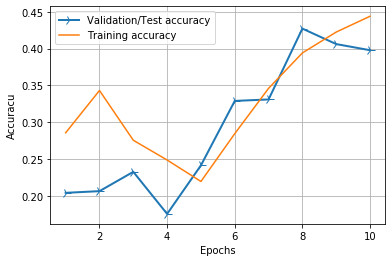

In [15]:
accValues = historyDict["acc"]
valAccValues = historyDict["val_acc"]

line1 = plt.plot(epochs, valAccValues, label = "Validation/Test accuracy")
line2 = plt.plot(epochs, accValues, label = "Training accuracy")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracu")
plt.grid(True)
plt.legend()
plt.show()

In [16]:
model.save("./resNet50Model.h5")